# Final Project Exploratory Data Analysis


## Project Title: The Impact of Urban Planning and Design on Obesity Levels
- Andrew Noonan
- AJN104@pitt.edu

### Project Abstract
Research question: What is the impact of Urban Planning/Walkability on Obesity Levels within Allegheny County?
This is interesting to me because it allows me investigate whether a statistically significant contributor to the rise in Obesity within the United States is due to the historical transition away from cities that were easily navigable by foot as well as public transportation like trains, to cities that are increasing only able to be traversed by car.I consider this project useful because we are increasingly facing a public health crisis with the rise in obesity in the United States. If it can be proven that cities that are more friendly to alternative means of transportation decrease obesity rates, perhaps that will sway policy makers to utilize another technique in improving Public Health. Leading from that, I believe policy makers would certainly benefit from my model.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
walk_score = pd.read_csv('walkscorect.xls-walk-score-by-ct.csv')
obesity_rates = pd.read_csv('obesity-ac-2006-2010censustracts.csv')
transit = pd.read_csv('prt.csv')
census_tracts = pd.read_csv('census_tracts.csv')

In [3]:
census_tracts.head()

,_id,objectid,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,shape_area,shape_length
0,10759,1,42,3,40500,1,420030405001,Block Group 1,G5030,S,...,7,40500,2,2775,2985,92.964824,92.96,Yes,5.079492e+06,10442.036450
1,10760,2,42,3,40400,1,420030404001,Block Group 1,G5030,S,...,6,40400,2,1365,2020,67.574257,67.57,Yes,2.105489e+06,6609.688123
2,10761,3,42,3,40200,2,420030402002,Block Group 2,G5030,S,...,5,40200,2,1070,1290,82.945736,82.94,Yes,5.998649e+06,18280.484081
3,10762,4,42,3,30500,2,420030305002,Block Group 2,G5030,S,...,4,30500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444
4,10763,5,42,3,980000,1,420039800001,Block Group 1,G5030,S,...,125,980000,1,65,220,29.545455,29.54,No,7.764866e+06,13581.875089


In [4]:
walk_score.isnull().sum()
walk_score.head(25)


,Census Tract,Walk Score
0,10300,82
1,20100,100
2,20300,83
3,30500,77
4,40200,71
5,40400,82
6,40500,78
7,40600,75
8,40900,68
9,50100,60


Dropping Null Values

In [5]:
obesity_rates.isnull().sum()
obesity_rates = obesity_rates.dropna()
obesity_rates.isnull().sum()
obesity_rates = obesity_rates.drop(['stname','MUNICIPALITY','tractfips', 'Municipality', '2000 Tract'], axis=1) # drop columns that are not needed
obesity_rates.head(25)

,2010 Tract,City Neighborhood,2006-2010 estimate of obesity
59,562900,Hazelwood,0.399853
364,561600,Arlington,0.334520
365,561600,Arlington Heights,0.473120
366,561700,Saint Clair,0.699500
367,561700,Mount Oliver Neighborhood,0.380567
368,"561900, 980000 & 981800",Lincoln-Lemington-Belmar,0.637099
369,562000 & 982200,North Oakland,0.070353
370,562300,Hazelwood,0.371847
371,562300,Glen Hazel,0.383138
372,562400,Bon Air,0.289505


Choosing to drop null values

In [6]:

transit.isnull().sum()
transit = transit.dropna()
transit.isnull().sum()
# drop columns that are not needed
transit = transit.drop(['Direction','CleverID','Direction', 'Routes_ser', 'Routes_cou', 'Mode', 'Shelter', 'Stop_type', 'On_avwk_FY', 'Off_avwk_F', 'On_avwk__1', 'Off_avwk_1', 'AvgWkdy_De', 'Timepoint', 'x', 'y'], axis=1)
transit.head(25)

,FID,StopID,Stop_name,Latitude,Longitude
0,1,E41755,NEGLEY AVE AT EAST BUSWAY STEPS,40.456073,-79.933320
1,2,E41760,NEGLEY AVE AT EAST LIBERTY BLVD,40.467388,-79.928150
2,3,E41770,NEGLEY AVE AT ELLSWORTH AVE,40.454623,-79.932406
3,4,E41771,NEGLEY AVE AT ELLSWORTH AVE,40.454766,-79.932659
4,5,E41780,NEGLEY AVE AT ELMER ST,40.453376,-79.931705
5,6,E41781,NEGLEY AVE AT ELMER ST FS,40.453283,-79.931823
6,7,E41790,NEGLEY AVE AT FRIENDSHIP AVE,40.460837,-79.932492
7,8,E41800,NEGLEY AVE AT FRIENDSHIP AVE,40.460442,-79.932349
8,9,E41810,NEGLEY AVE AT HAMPTON ST,40.475643,-79.924655
9,10,E41820,NEGLEY AVE AT HAMPTON ST,40.475199,-79.924472


### Why I chose to drop missing values
I choose to drop missing values, because for most of the missing values in this dataset an average doesn't make sense.

### Visualizing Data/Outliers

In [7]:
transit_geo = gpd.read_file('prt-stops.geojson.geojson')

In [15]:
transit_geo.head()

,StopID,Stop_name,CleverID,Direction,Timepoint,Routes_ser,Routes_cou,Latitude,Longitude,Mode,Shelter,Stop_type,On_avwk_FY,Off_avwk_F,On_avwk__1,Off_avwk_1,AvgWkdy_De,geometry
0,E00175,26TH ST AT PENN AVE FS (SPRING WAY),2593.0,Inbound,N,"54, 88, 91",3.0,40.454635,-79.978170,Bus,No Shelter,Bus Stop,34.531580,43.900523,35,44,0.03,POINT (-79.97817 40.45464)
1,E00180,28TH ST AT LIBERTY AVE,2161.0,Inbound,N,54,1.0,40.456288,-79.974651,Bus,No Shelter,Bus Stop,1.304759,10.216890,1,10,0.03,POINT (-79.97465 40.45629)
2,E00270,32ND ST AT SPRING WAY,2410.0,Outbound,N,"54, 88, 91",3.0,40.460347,-79.969436,Bus,No Shelter,Bus Stop,13.184478,33.410865,13,33,0.04,POINT (-79.96944 40.46035)
3,E00420,40TH ST AT BUTLER ST,1199.0,Outbound,N,93,1.0,40.468655,-79.962115,Bus,No Shelter,Bus Stop,1.038249,28.682688,1,29,0.05,POINT (-79.96212 40.46866)
4,E00430,40TH ST AT DAVIDSON ST FS,20106.0,Outbound,N,93,1.0,40.467676,-79.960929,Bus,No Shelter,Bus Stop,0.163421,12.588603,0,13,0.00,POINT (-79.96093 40.46768)


<Axes: >

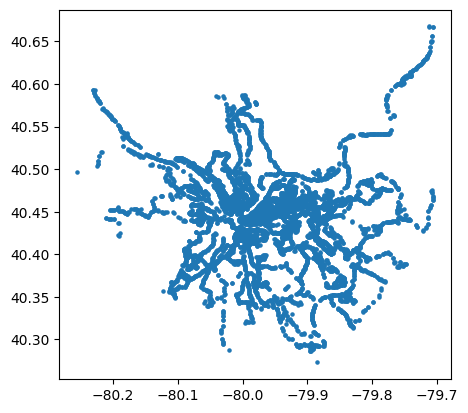

In [8]:
transit_geo.plot(markersize=5)

<Axes: >

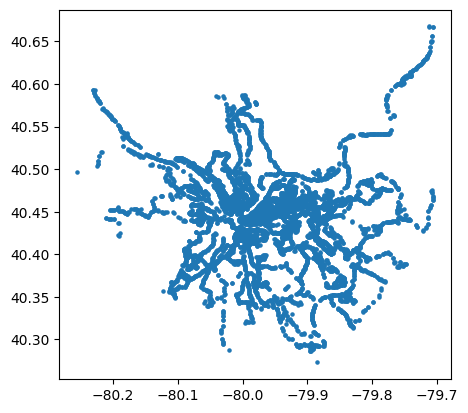

In [9]:
census_tracts_geo = gpd.read_file('pittsburghpa2010-census-tracts.geojson.geojson')
census_tracts_geo.set_crs(epsg=4326, allow_override=True, inplace=True)
transit_geo.set_crs(epsg=4326, allow_override=True, inplace=True)
transit_geo.plot(markersize=5)

<Axes: >

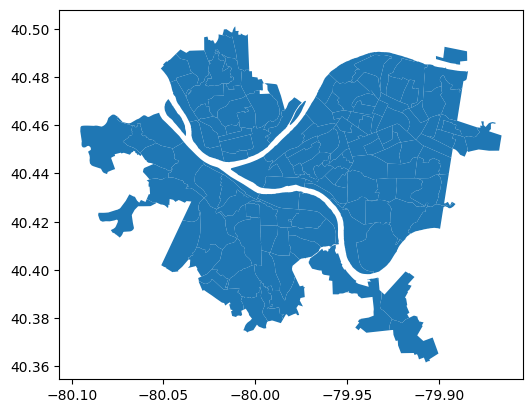

In [10]:
census_tracts_geo.plot()

In [11]:
census_tracts_geo.columns
census_tracts_geo.head()

,objectid,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,aland10,...,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,Shape__Area,Shape__Length,geometry
0,1,42,003,040500,1,420030405001,Block Group 1,G5030,S,268195,...,040500,2,2775,2985,92.964824,92.96,Yes,5.079492e+06,10442.036450,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,42,003,040400,1,420030404001,Block Group 1,G5030,S,75472,...,040400,2,1365,2020,67.574257,67.57,Yes,2.105489e+06,6609.688123,"POLYGON ((-79.94727 40.44703, -79.94716 40.446..."
2,3,42,003,040200,2,420030402002,Block Group 2,G5030,S,282679,...,040200,2,1070,1290,82.945736,82.94,Yes,5.998649e+06,18280.484081,"POLYGON ((-79.9623 40.44294, -79.9622 40.44289..."
3,4,42,003,030500,2,420030305002,Block Group 2,G5030,S,284548,...,030500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,5,42,003,980000,1,420039800001,Block Group 1,G5030,S,637235,...,980000,1,65,220,29.545455,29.54,No,7.764866e+06,13581.875089,"POLYGON ((-79.8846 40.49066, -79.88451 40.4867..."


In [12]:
transit_geo.columns
transit_geo_filtered = transit_geo[transit_geo.geometry.within(census_tracts_geo.unary_union)]

/tmp/ipykernel_21446/2289483868.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  transit_geo_filtered = transit_geo[transit_geo.geometry.within(census_tracts_geo.unary_union)]


,StopID,Stop_name,CleverID,Direction,Timepoint,Routes_ser,Routes_cou,Latitude,Longitude,Mode,Shelter,Stop_type,On_avwk_FY,Off_avwk_F,On_avwk__1,Off_avwk_1,AvgWkdy_De,geometry
0,E00175,26TH ST AT PENN AVE FS (SPRING WAY),2593.0,Inbound,N,"54, 88, 91",3.0,40.454635,-79.978170,Bus,No Shelter,Bus Stop,34.531580,43.900523,35,44,0.03,POINT (-79.97817 40.45464)
1,E00180,28TH ST AT LIBERTY AVE,2161.0,Inbound,N,54,1.0,40.456288,-79.974651,Bus,No Shelter,Bus Stop,1.304759,10.216890,1,10,0.03,POINT (-79.97465 40.45629)
2,E00270,32ND ST AT SPRING WAY,2410.0,Outbound,N,"54, 88, 91",3.0,40.460347,-79.969436,Bus,No Shelter,Bus Stop,13.184478,33.410865,13,33,0.04,POINT (-79.96944 40.46035)
3,E00420,40TH ST AT BUTLER ST,1199.0,Outbound,N,93,1.0,40.468655,-79.962115,Bus,No Shelter,Bus Stop,1.038249,28.682688,1,29,0.05,POINT (-79.96212 40.46866)
4,E00430,40TH ST AT DAVIDSON ST FS,20106.0,Outbound,N,93,1.0,40.467676,-79.960929,Bus,No Shelter,Bus Stop,0.163421,12.588603,0,13,0.00,POINT (-79.96093 40.46768)


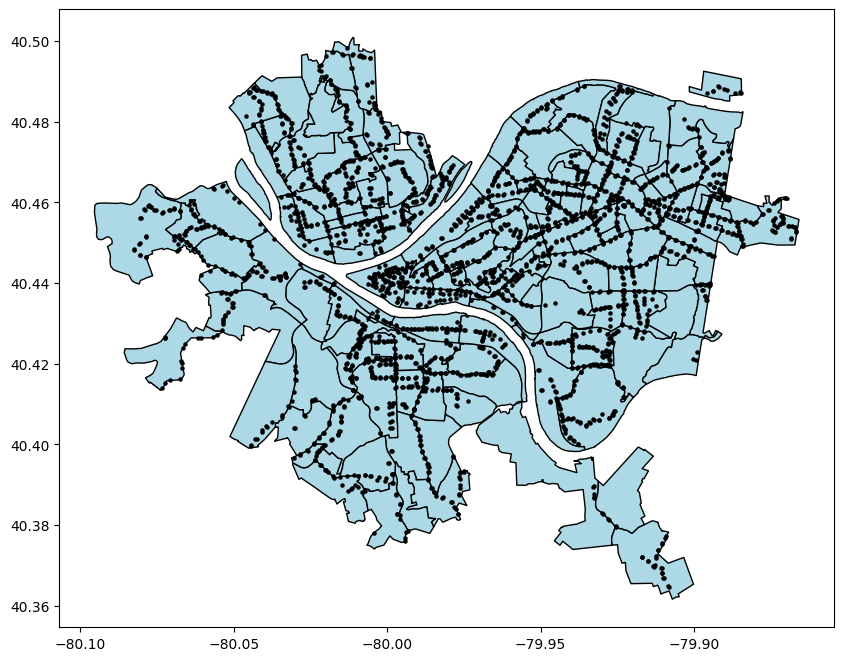

In [13]:
fig,ax = plt.subplots(figsize=(10,10))
census_tracts_geo.plot(ax=ax, color='lightblue', edgecolor='black')
transit_geo_filtered.plot(ax=ax, color='black', markersize=5)
transit_geo_filtered.head()

In [20]:
transit_with_tracts = gpd.sjoin(transit_geo_filtered, census_tracts_geo, how="left", predicate="within")


   StopID                            Stop_name  CleverID Direction Timepoint  \
0  E00175  26TH ST AT PENN AVE FS (SPRING WAY)    2593.0   Inbound         N   
1  E00180               28TH ST AT LIBERTY AVE    2161.0   Inbound         N   
2  E00270                32ND ST AT SPRING WAY    2410.0  Outbound         N   
3  E00420                 40TH ST AT BUTLER ST    1199.0  Outbound         N   
4  E00430            40TH ST AT DAVIDSON ST FS   20106.0  Outbound         N   

   Routes_ser  Routes_cou   Latitude  Longitude Mode  ... objectid_1  \
0  54, 88, 91         3.0  40.454635 -79.978170  Bus  ...          3   
1          54         1.0  40.456288 -79.974651  Bus  ...          3   
2  54, 88, 91         3.0  40.460347 -79.969436  Bus  ...          3   
3          93         1.0  40.468655 -79.962115  Bus  ...         28   
4          93         1.0  40.467676 -79.960929  Bus  ...         28   

  tractce10_1  cnt_tractce10  sum_lowmod2018 sum_lowmoduniv lowmodperct  \
0      0203

In [21]:
transit_with_tracts.head()

,StopID,Stop_name,CleverID,Direction,Timepoint,Routes_ser,Routes_cou,Latitude,Longitude,Mode,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,Shape__Area,Shape__Length
0,E00175,26TH ST AT PENN AVE FS (SPRING WAY),2593.0,Inbound,N,"54, 88, 91",3.0,40.454635,-79.978170,Bus,...,3,020300,1,110,730,15.068493,15.06,No,1.694875e+07,24019.532672
1,E00180,28TH ST AT LIBERTY AVE,2161.0,Inbound,N,54,1.0,40.456288,-79.974651,Bus,...,3,020300,1,110,730,15.068493,15.06,No,1.694875e+07,24019.532672
2,E00270,32ND ST AT SPRING WAY,2410.0,Outbound,N,"54, 88, 91",3.0,40.460347,-79.969436,Bus,...,3,020300,1,110,730,15.068493,15.06,No,1.694875e+07,24019.532672
3,E00420,40TH ST AT BUTLER ST,1199.0,Outbound,N,93,1.0,40.468655,-79.962115,Bus,...,28,090200,3,1370,2805,48.841355,48.84,No,4.755655e+06,10005.363139
4,E00430,40TH ST AT DAVIDSON ST FS,20106.0,Outbound,N,93,1.0,40.467676,-79.960929,Bus,...,28,090200,3,1370,2805,48.841355,48.84,No,4.755655e+06,10005.363139


In [22]:
points_counts = transit_with_tracts.groupby('tractce10').size().reset_index(name='point_count')

In [23]:
points_counts.head()

,tractce10,point_count
0,010300,29
1,020100,104
2,020300,31
3,030500,29
4,040200,35


<Axes: xlabel='Walk Score', ylabel='Count'>

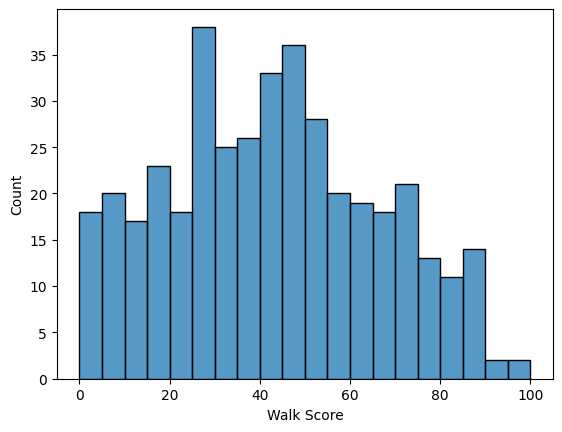

In [14]:
walk_score.dtypes
sns.histplot(data=walk_score,x= walk_score['Walk Score'], bins=20)

<Axes: xlabel='Walk Score'>

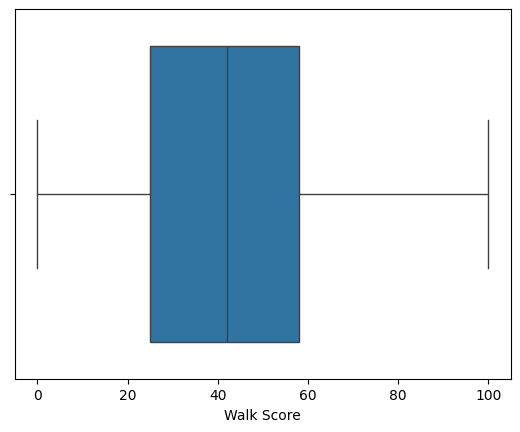

In [ ]:
sns.boxplot(data=walk_score, x='Walk Score')

In [16]:
walk_score['Walk Score'].describe()

count    402.000000
mean      42.330846
std       23.404659
min        0.000000
25%       25.000000
50%       42.000000
75%       58.000000
max      100.000000
Name: Walk Score, dtype: float64

Walk score doesn't seem to show any outliers

In [17]:
obesity_rates.dtypes

2010 Tract                        object
City Neighborhood                 object
2006-2010 estimate of obesity    float64
dtype: object

<Axes: xlabel='2006-2010 estimate of obesity', ylabel='Count'>

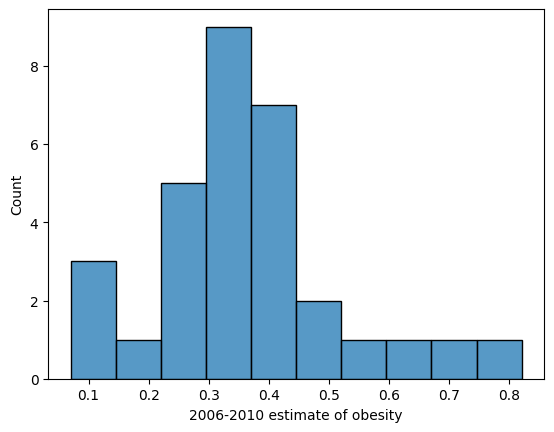

In [18]:
sns.histplot(data=obesity_rates,x= '2006-2010 estimate of obesity')

<Axes: xlabel='2006-2010 estimate of obesity'>

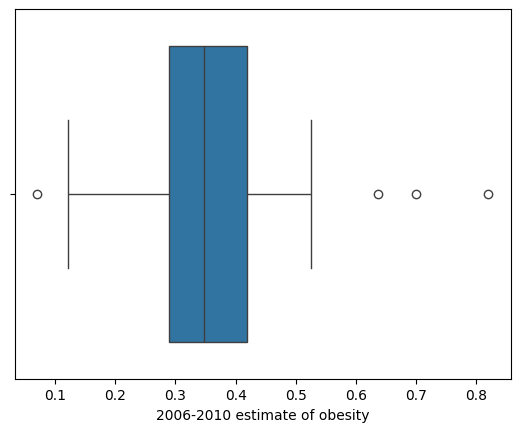

In [ ]:
sns.boxplot(data=obesity_rates, x='2006-2010 estimate of obesity')

In [20]:
obesity_rates['2006-2010 estimate of obesity'].describe()

count    31.000000
mean      0.367351
std       0.155702
min       0.070353
25%       0.288704
50%       0.348089
75%       0.419149
max       0.820311
Name: 2006-2010 estimate of obesity, dtype: float64

Obesity rates to show some outliers, but I plan to keep those outliers, because they don't appear to be errors, but rather valid entries in the datasets.

In [27]:
points_counts['point_count'].describe()

count    137.000000
mean      21.649635
std       14.072079
min        1.000000
25%       13.000000
50%       19.000000
75%       28.000000
max      104.000000
Name: point_count, dtype: float64

<Axes: xlabel='point_count'>

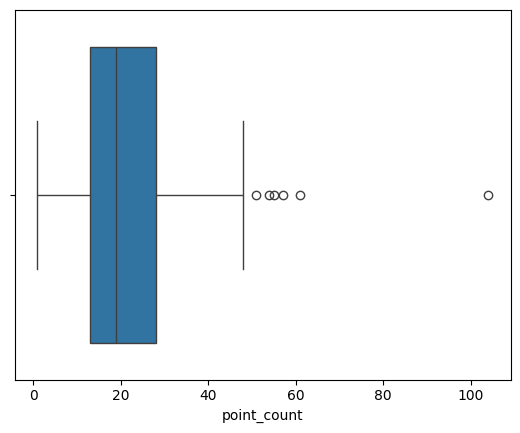

In [28]:
sns.boxplot(data=points_counts, x='point_count')

Similarly for Obesity, these seem like valid values and so I will not discard them

<Axes: xlabel='point_count', ylabel='Count'>

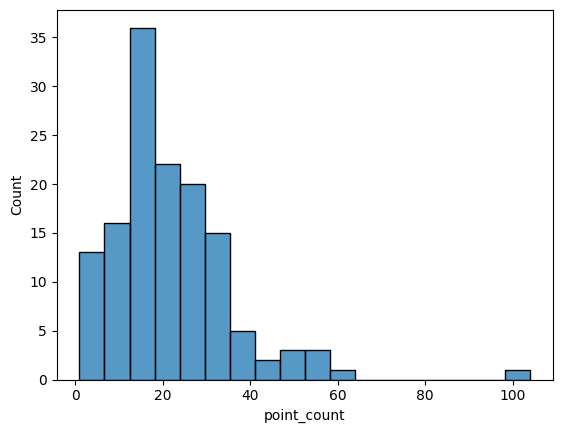

In [29]:
sns.histplot(data=points_counts,x= 'point_count')